<a href="https://colab.research.google.com/github/AnitaKirkovska/Machine_Learning_Class/blob/master/HW2/My_Solutions/CIFAR10_Architecture_v2_Two_Dropouts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simple hold-out validation - Using [Second CNN](https://github.com/AnitaKirkovska/Machine_Learning_Class/blob/master/HW2/My_Solutions/CIFAR10_Architecture_v2_WithoutNormalizations.ipynb) **

Using the v1 model with 2 Drop-outs




```
Overfitting is more decreased than with 1 dropout. Training set is approaching 1 slowly and validation accuracy is little higher than without Dropout or with 1 drop out.

Accuracy without Dropout = 71.54%
Accuracy with Dropout = 75.55%
Accuracy with 2 Dropouts = 75.79%
```



**Loading the CIFAR10 set**

In [0]:
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 40s 0us/step


**Preparing data**

Training/Validation 80%/20%


In [0]:
import sklearn.model_selection as skl 

train_images, val_images, train_labels, val_labels = skl.train_test_split(train_images, train_labels, test_size=0.20)

print("train images",train_images.shape)
print("val images",val_images.shape)

train images (40000, 32, 32, 3)
val images (10000, 32, 32, 3)


**Preprocess the data**

In [0]:
from keras.utils import to_categorical

train_images = train_images.astype('float32')/255
val_images = val_images.astype('float32')/255

train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)

**The Architecture**

In [0]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(256, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Dropout(0.25))

model.add(layers.Flatten())

model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 256)         295168    
_________________________________________________________________
max_pooling2d_3 (MaxP

**Compiling the model**

In [0]:
import keras
opt = keras.optimizers.rmsprop(lr=0.0005, decay=1e-6)

model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'])

**Training the model**

In [0]:
history = model.fit(train_images,
          train_labels,
          batch_size=128,
          epochs = 50,
          validation_data=(val_images, val_labels))

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 12s 289us/step - loss: 1.8864 - acc: 0.3095 - val_loss: 1.5793 - val_acc: 0.4303
Epoch 2/50
40000/40000 [==============================] - 7s 172us/step - loss: 1.5651 - acc: 0.4326 - val_loss: 1.4288 - val_acc: 0.4857
Epoch 3/50
40000/40000 [==============================] - 7s 173us/step - loss: 1.4250 - acc: 0.4894 - val_loss: 1.3192 - val_acc: 0.5372
Epoch 4/50
40000/40000 [==============================] - 7s 172us/step - loss: 1.3190 - acc: 0.5290 - val_loss: 1.2407 - val_acc: 0.5755
Epoch 5/50
40000/40000 [==============================] - 7s 172us/step - loss: 1.2412 - acc: 0.5625 - val_loss: 1.1796 - val_acc: 0.5890
Epoch 6/50
40000/40000 [==============================] - 7s 172us/step - loss: 1.1674 - acc: 0.5899 - val_loss: 1.1527 - val_acc: 0.6010
Epoch 7/50
40000/40000 [==============================] - 7s 173us/step -

**Plotting the model**

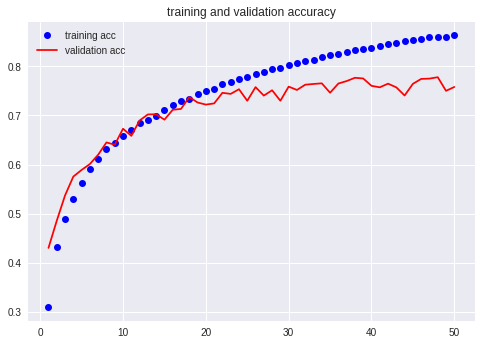

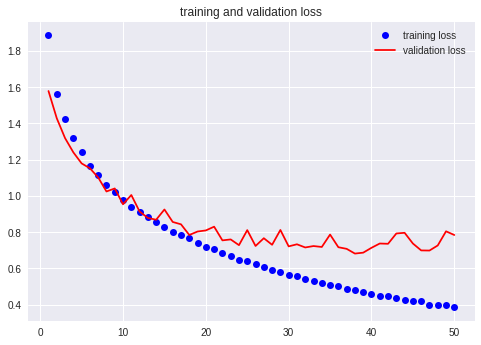

In [0]:

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, acc, 'bo', 
         label='training acc')
plt.plot(epochs, val_acc, 'r', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.title('training and validation loss')

plt.legend()

plt.show()

**Evaluate the model with validation set**

In [0]:

score = model.evaluate(val_images, val_labels, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1]*100,"%")

Validation loss: 0.7841863094329834
Validation accuracy: 75.79 %
